In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [12]:
titanic = pd.read_csv("./res/titanic/train.csv", index_col="PassengerId")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Grouping
* pandas.DataFrame.groupby()<br>
[[group에서 NA]](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#na-values-in-groupby) <br>
groupby를 하게 되면 자동적으로 NA값을 배제한다<br><br>
* pandas.DataFrame.size()<br>
NaN 포함한 각 그룹의 행 개수를 출력하기 때문에  NaN값을 고려해야한다

각 feature 당 NaN의 개수

In [51]:
numMissing = titanic.shape[0] - titanic.count()
numMissing

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
titanic["Pclass"].isna().value_counts() # not exist Na in Pclass column

False    891
Name: Pclass, dtype: int64

In [37]:
titanic.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [262]:
survivedPclass = titanic[titanic["Survived"] == 1][["Pclass", "Survived"]].groupby(['Pclass']).size()
survivedPclass

Pclass
1    136
2     87
3    119
dtype: int64

In [267]:
ratesurvivedPclass = titanic[["Pclass", "Survived"]].groupby(['Pclass']).mean()
ratesurvivedPclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Ticket class가 높을수록 생존 확률이 높다

## 시각화
[matplotlib.axes.Axes.legend 참고 페이지](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html)

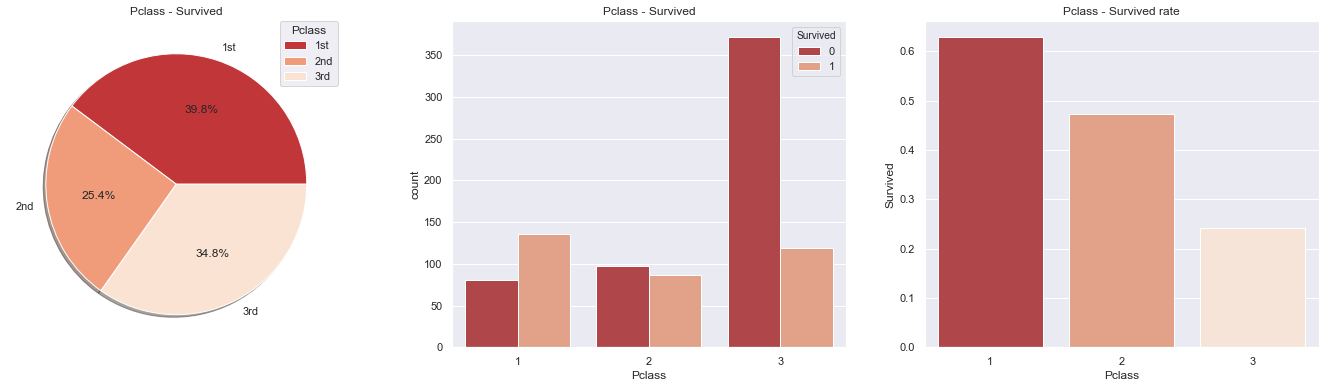

In [278]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.patch.set_facecolor('#FFFFFF')
sns.set(font_scale=1.5)
sns.set(palette="RdBu")

lClass = ["1st", "2nd", "3rd"]
survivedPclass.plot.pie(autopct="%1.1f%%", labels = lClass, ax=axes[0], subplots=True, shadow=True)
axes[0].set_title("Pclass - Survived")
axes[0].set_ylabel('')

# bbox_to_anchor=(x, y, width, height)
axes[0].legend(title="Pclass", loc="center left", bbox_to_anchor=(0.8, 0.4, 0.5, 1))

sns.countplot(data=titanic, x = "Pclass", hue="Survived", ax=axes[1])
axes[1].set_title("Pclass - Survived")

sns.barplot(data=ratesurvivedPclass, x=ratesurvivedPclass.index,y=ratesurvivedPclass["Survived"], ax=axes[2])
axes[2].set_title("Pclass - Survived rate")

plt.show()


In [114]:
titanic.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [14]:
titanic["Embarked"].isna().value_counts() # 2 of Na in Embarked column

False    889
True       2
Name: Embarked, dtype: int64

In [54]:
titanic.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [55]:
titanic["Sex"].isna().value_counts() # not exist Na in Sex column

False    891
Name: Sex, dtype: int64

In [52]:
titanic.groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [19]:
titanic["Age"].isna().value_counts() # 177 of Na in Age column

False    714
True     177
Name: Age, dtype: int64

In [67]:
titanic[titanic["Age"] >= 1].groupby(["Age", "Survived"]).size()

Age   Survived
1.0   0            2
      1            5
2.0   0            7
      1            3
3.0   0            1
      1            5
4.0   0            3
      1            7
5.0   1            4
6.0   0            1
      1            2
7.0   0            2
      1            1
8.0   0            2
      1            2
9.0   0            6
      1            2
10.0  0            2
11.0  0            3
      1            1
12.0  1            1
13.0  1            2
14.0  0            3
      1            3
14.5  0            1
15.0  0            1
      1            4
16.0  0           11
      1            6
17.0  0            7
                  ..
51.0  0            5
      1            2
52.0  0            3
      1            3
53.0  1            1
54.0  0            5
      1            3
55.0  0            1
      1            1
55.5  0            1
56.0  0            2
      1            2
57.0  0            2
58.0  0            2
      1            3
59.0  0            

나이구간 <br>
0  :  0 ~ 20 <br>
1 : 20 ~ 40 <br>
2 : 40 ~ 60 <br>
3 : 60 ~ 80 <br>
4 : 80 ~

In [227]:
bins = np.linspace(titanic["Age"].min(), titanic["Age"].max() , 5 ,dtype = np.uint32)
bins

array([ 0, 20, 40, 60, 80], dtype=uint32)

In [309]:
np.digitize( titanic["Age"], bins)

array([2, 2, 2, 2, 2, 5, 3, 1, 2, 1, 1, 3, 2, 2, 1, 3, 1, 5, 2, 5, 2, 2,
       1, 2, 1, 2, 5, 1, 5, 5, 3, 5, 5, 4, 2, 3, 5, 2, 1, 1, 3, 2, 5, 1,
       1, 5, 5, 5, 5, 1, 1, 2, 3, 2, 4, 5, 2, 2, 1, 1, 2, 2, 3, 1, 5, 5,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 5, 5, 1, 2, 2, 2, 5, 2, 1, 2, 1, 5,
       2, 2, 2, 2, 3, 2, 3, 5, 4, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5,
       3, 1, 2, 2, 1, 2, 4, 2, 2, 1, 2, 5, 2, 2, 3, 1, 5, 2, 5, 3, 2, 2,
       3, 2, 2, 2, 1, 2, 1, 2, 5, 2, 2, 1, 1, 1, 2, 1, 2, 3, 3, 2, 3, 3,
       5, 3, 1, 2, 5, 5, 3, 3, 2, 1, 1, 1, 5, 3, 5, 2, 4, 1, 1, 2, 3, 1,
       5, 3, 2, 2, 5, 5, 1, 1, 1, 5, 5, 3, 3, 2, 2, 1, 1, 1, 3, 3, 5, 3,
       5, 2, 2, 5, 2, 3, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 5, 2, 2, 3, 2, 2,
       1, 2, 3, 5, 2, 2, 1, 2, 1, 5, 2, 2, 3, 1, 2, 5, 3, 1, 1, 2, 5, 5,
       2, 2, 2, 3, 2, 2, 2, 3, 5, 2, 4, 2, 3, 2, 5, 2, 2, 3, 5, 1, 3, 3,
       5, 2, 1, 2, 3, 2, 5, 2, 3, 2, 5, 4, 3, 5, 1, 2, 4, 2, 1, 1, 5, 2,
       2, 2, 3, 2, 2, 1, 2, 2, 2, 5, 2, 1, 5, 3, 5,

In [286]:
# np.digitize()를 사용하면 구간이 1부터 시간하기때문에 -1을 해줘서 구간을 0부터 시작합니다
# return_counts를 True로 해서 중복 되지 않는 요소들의 수를 계산합니다
np.unique(np.digitize(titanic["Age"], bins)-1, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([164, 387, 137,  25, 178], dtype=int64))

In [ ]:
titanic["AgeGroup"] = np.digitize( titanic["Age"], bins) - 1

## 이상치 확인

In [17]:
titanic["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
ageNotNull = titanic[titanic["Age"].notnull()]["Age"]

([<matplotlib.axis.XTick at 0x2a7f9858550>],
 <a list of 1 Text xticklabel objects>)

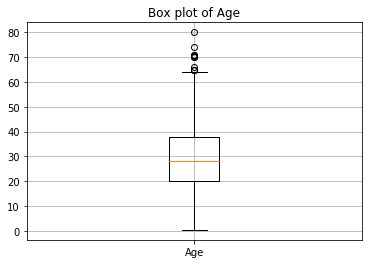

In [19]:
fig = plt.figure()
fig.patch.set_facecolor("xkcd:white")
plt.title("Box plot of Age")
plt.boxplot(ageNotNull, sym="o")
plt.grid()
plt.xticks([1], ["Age"])

## One-hotencoding 호칭

In [288]:
p = re.compile("([A-Z][a-z]+)[.]") # title을 추출하는 pattern
titanic["title"] = titanic["Name"].str.findall(p).str[0]
titanic[["Name", "title"]]

,Name,title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


In [21]:
titanic["title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Countess.      1
Ms.            1
Capt.          1
Jonkheer.      1
Don.           1
Sir.           1
Lady.          1
Mme.           1
Name: title, dtype: int64

In [294]:
tempTitle = np.unique(titanic["title"], return_counts = True)[0]
tempTitle

array(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir'], dtype=object)

In [296]:
tempIdx = np.array([ i for i in range(len(tempTitle))]).reshape(-1, 1) 
tempIdx

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [299]:
ohe = OneHotEncoder()
ohe.fit(tempIdx)
ohe.n_values_

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function n_values_ is deprecated; The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


array([17])

In [302]:
tempOhe = ohe.transform(tempIdx).toarray()
tempOhe.shape, tempTitle.reshape(17,1)

((17, 17), array([['Capt'],
        ['Col'],
        ['Countess'],
        ['Don'],
        ['Dr'],
        ['Jonkheer'],
        ['Lady'],
        ['Major'],
        ['Master'],
        ['Miss'],
        ['Mlle'],
        ['Mme'],
        ['Mr'],
        ['Mrs'],
        ['Ms'],
        ['Rev'],
        ['Sir']], dtype=object))

In [305]:
tempDf = pd.concat([pd.Series(tempTitle), pd.DataFrame(tempOhe)], axis = 1)
tempDf

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Capt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Col,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Countess,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Don,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Jonkheer,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Lady,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Major,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Master,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## One-hotencoding 나이

In [310]:
bins = np.linspace(titanic["Age"].min(), titanic["Age"].max() , 5 ,dtype = np.uint32)
bins

array([ 0, 20, 40, 60, 80], dtype=uint32)

In [311]:
titanic["AgeGroup"] = np.digitize( titanic["Age"], bins) - 1
titanic[["Age", "AgeGroup"]] # NaN값을 가지면 최대값으로 처리되는걸 알 수 있다

,Age,AgeGroup
PassengerId,,
1,22.0,1
2,38.0,1
3,26.0,1
4,35.0,1
5,35.0,1
6,NaN,4
7,54.0,2
8,2.0,0
9,27.0,1


In [313]:
ohe = OneHotEncoder() 
ohe.fit(np.array(titanic[titanic["AgeGroup"].notnull()]["AgeGroup"]).reshape(-1, 1))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [317]:
ohe.transform(np.array(titanic["AgeGroup"]).reshape(-1, 1)).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])